In [1]:
from sklearn import datasets

diabetes = datasets.load_diabetes()

In [2]:
import pandas as pd

In [3]:
df = pd.DataFrame(
    diabetes.data,
    columns=diabetes.feature_names,
)

df["target"] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [4]:
from sklearn.model_selection import train_test_split

# X: 特徴量
X = df.drop(columns="target")
# y: 目的変数
y = df["target"]

In [36]:
# 学習用とテスト用のデータに分ける
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.6, random_state=1
)

In [37]:
from sklearn import linear_model

# 線形回帰モデルを作成
regr = linear_model.LinearRegression()

# 学習用データで学習
regr.fit(X_train, y_train)

# テスト用データを使って、ターゲットを予測
y_pred = regr.predict(X_test)

In [38]:
pd.DataFrame(
    {
        "pred": y_pred,
        "test": y_test,
    }
)

,pred,test
246,131.358176,78.0
425,106.789203,152.0
293,182.080812,200.0
31,69.340765,59.0
359,171.862121,311.0
...,...,...
48,64.956485,75.0
362,222.371510,321.0
309,156.490076,142.0
33,109.946228,87.0


In [39]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.4493046550293003

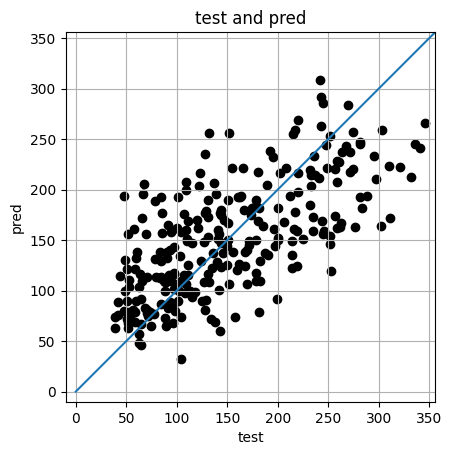

In [41]:
import matplotlib.pyplot as plt

# グラフを正方形にする
plt.axes().set_aspect("equal", adjustable="box")

# 実測値をX軸、予測値をY軸とする散布図を描画
plt.scatter(y_test, y_pred, color="black")

# X軸とY軸の表示範囲を揃える
max_value = max([max(y_pred), max(y_test)])
plt.xlim(-10, max_value+10)
plt.ylim(-10, max_value+10)

# 対角線を引く
plt.plot([0, max_value+10], [0, max_value+10])

# 各種ラベルをつける
plt.xlabel("test")
plt.ylabel("pred")
plt.title("test and pred")
plt.grid(which="both")
plt.show()